In [1]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 5.8 MB 42.8 MB/s 
     |████████████████████████████████| 1.6 MB 34.1 MB/s 
     |████████████████████████████████| 438 kB 71.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

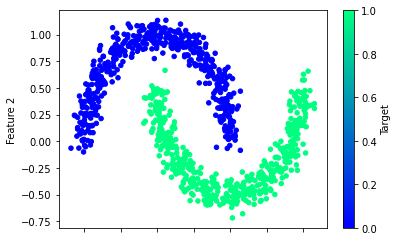

In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [3]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [4]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4293
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.4387
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.4507
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.4653
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.4773
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.4853
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.4960
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5160
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.5267
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.5360
Epoch 11/

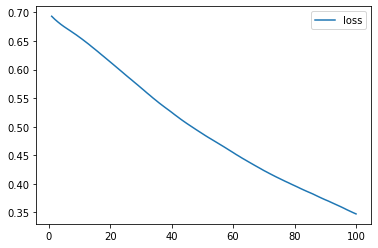

In [8]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

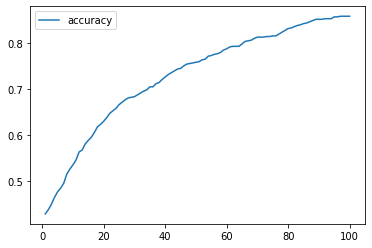

In [9]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [10]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [11]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.5741 - accuracy: 0.6533
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7893
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.8320
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.8547
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4457 - accuracy: 0.8587
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4222 - accuracy: 0.8653
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8667
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8680
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3666 - accuracy: 0.8667
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8693
Epoch 11/